## IMDB Dataset NLP project Using Machine Learning

In [267]:
import pandas as pd
import numpy as np

In [268]:
data = pd.read_csv('/content/news.csv')
data['label'] = data['label'].map({'FAKE':0, 'REAL':1})
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [269]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [270]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_word = set(stopwords.words('english'))
def preprocess_text(text):
  text = re.sub(r'<.*?>','', text)
  text = re.sub(r'[^\w\s]','',text)
  text = text.lower()
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_word ]
  return ''.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.3)
X_train = vectorizer.fit_transform(data['cleaned_text'])
X_test = vectorizer.transform(data['cleaned_text'])
y_train = data['label']
y_test = data['label']

In [272]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best params: {grid.best_params_}")

Best params: {'C': 1, 'kernel': 'linear'}


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00      3171

    accuracy                           1.00      6335
   macro avg       1.00      1.00      1.00      6335
weighted avg       1.00      1.00      1.00      6335



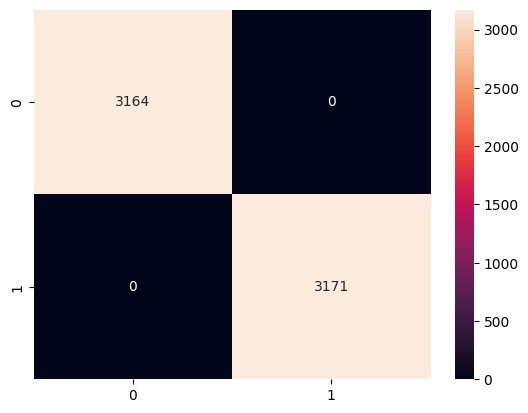

In [273]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()